In [18]:
!pip install -q tensorflow --break-system-packages

In [19]:
!pip show tensorflow

Name: tensorflow
Version: 2.20.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/init/.local/lib/python3.12/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google_pasta, grpcio, h5py, keras, libclang, ml_dtypes, numpy, opt_einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing_extensions, wrapt
Required-by: 


In [2]:
!export TF_ENABLE_ONEDNN_OPTS=0

In [6]:
import tensorflow as tf
from tensorflow. keras import layers, Model
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [7]:
input_columns = [
    'CO2_Room', 'CO_Room', 'H2_Room', 'Humidity_Room', 'PM05_Room', 'PM100_Room',
    'PM10_Room', 'PM25_Room', 'PM40_Room', 'PM_Room_Typical_Size', 'PM_Total_Room',
    'Temperature_Room', 'VOC_Room', 'VOC_Room_RAW',
    'CO2_Room_Trend', 'CO_Room_Trend', 'H2_Room_Trend', 'PM05_Room_Trend',
    'PM10_Room_Trend', 'PM25_Room_Trend', 'PM40_Room_Trend', 'PM100_Room_Trend',
    'PM_Room_Typical_Size_Trend', 'VOC_Room_RAW_Trend'
]

# Ignored: Unnamed: 0, Date, Sensor_ID, scenario_label, number_label, UV_Room, Interval_label, class
# Target (y)
target_column = 'class'

In [8]:
df = pd.read_csv('Laboratory Fire Dataset containing Multi Sensor Data.csv')

In [10]:
df.head()

,Unnamed: 0,Date,Sensor_ID,CO2_Room,CO_Room,H2_Room,Humidity_Room,PM05_Room,PM100_Room,PM10_Room,...,CO2_Room_Trend,CO_Room_Trend,H2_Room_Trend,PM05_Room_Trend,PM10_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,PM100_Room_Trend,PM_Room_Typical_Size_Trend,VOC_Room_RAW_Trend
0,0,0,sensornode0005,568.4,-0.15,0.58,42.44,46,0,7,...,-0.576667,0.933333,-0.960000,-0.926667,-0.773333,0.0,0.0,0.0,-0.766667,0.726667
1,1,0,sensornode0006,637.3,-0.12,0.79,42.34,48,0,7,...,-0.876667,0.920000,-0.960000,-0.936667,-0.756667,0.0,0.0,0.0,0.296667,0.696667
2,2,0,sensornode0007,792.2,-0.19,0.39,42.92,52,0,8,...,0.320000,0.906667,-0.826667,-0.966667,-0.826667,0.0,0.0,0.0,0.140000,0.583333
3,3,0,sensornode0008,660.7,0.65,0.53,44.31,50,0,7,...,-0.036667,0.960000,-0.933333,-0.936667,-0.850000,0.0,0.0,0.0,-0.123333,0.896667
4,4,10,sensornode0005,592.5,-0.06,0.38,42.55,48,0,7,...,-0.576667,0.933333,-0.960000,-0.926667,-0.773333,0.0,0.0,0.0,-0.766667,0.726667


In [11]:
df_data = df[input_columns].copy()

In [12]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_data), columns=input_columns)

In [13]:
df_scaled.head()

,CO2_Room,CO_Room,H2_Room,Humidity_Room,PM05_Room,PM100_Room,PM10_Room,PM25_Room,PM40_Room,PM_Room_Typical_Size,...,CO2_Room_Trend,CO_Room_Trend,H2_Room_Trend,PM05_Room_Trend,PM10_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,PM100_Room_Trend,PM_Room_Typical_Size_Trend,VOC_Room_RAW_Trend
0,-0.481909,-0.514276,-0.336817,0.364765,-0.629880,-0.387102,-0.489971,-0.427968,-0.422426,-0.567421,...,-1.138983,1.183488,-1.321759,-1.524677,-1.389160,-0.118454,-0.190139,-0.213317,-1.774190,0.905671
1,-0.415762,-0.513073,-0.305865,0.347072,-0.629756,-0.387102,-0.489971,-0.427968,-0.422426,-0.567421,...,-1.599214,1.161468,-1.321759,-1.545308,-1.355242,-0.118454,-0.190139,-0.213317,0.697838,0.866244
2,-0.267050,-0.515879,-0.364821,0.449692,-0.629508,-0.387102,-0.489897,-0.427968,-0.422426,-0.408544,...,0.236596,1.139449,-1.148266,-1.607201,-1.497696,-0.118454,-0.190139,-0.213317,0.333621,0.717301
3,-0.393296,-0.482210,-0.344186,0.695627,-0.629632,-0.387102,-0.489971,-0.427968,-0.422426,-0.758073,...,-0.310568,1.227526,-1.287060,-1.545308,-1.545181,-0.118454,-0.190139,-0.213317,-0.278574,1.129086
4,-0.458772,-0.510668,-0.366295,0.384228,-0.629756,-0.387102,-0.489971,-0.427968,-0.422426,-0.567421,...,-1.138983,1.183488,-1.321759,-1.524677,-1.389160,-0.118454,-0.190139,-0.213317,-1.774190,0.905671


In [14]:
# Hyperparameters
LATENT_DIM = 100  # Dimension of the noise vector (z)
DATA_DIM = len(input_columns)  # 24 features
BATCH_SIZE = 118
EPOCHS = 100  # Start with a moderate number of epochs
LEARNING_RATE = 0.0002
BETA_1 = 0.5  # Standard for GANs with Adam optimizer

1. LATENT_DIM = 100
What it means:

This is the dimension of the noise vector (z) fed into the generator.

Why it's important:

The generator learns to map this random noise into realistic samples.

Higher dimensions → richer diversity but harder to train.

100 is a standard choice for GANs (used in DCGAN, etc.).

2. DATA_DIM = len(input_columns)
What it means:

This is the dimension of your output data — basically the number of features your generator must produce.

Why it's important:

Since your dataset has 24 input features, the generator must output a 24-dimensional vector and the discriminator must accept the same shape.

3. BATCH_SIZE = 118
What it means:

This is the number of samples fed into the discriminator (and used to train the generator) in one forward/backward pass.

Why it's important:

Larger batch size → more stable gradients but requires more memory.

Smaller batch size → noisier updates but sometimes helps GANs train better.

You picked 118, which might be tied to your dataset size.

4. EPOCHS = 100
What it means:

One epoch = one full pass over the entire training dataset.
You are training the GAN for 100 epochs.

Why it's important:

GANs often need more epochs than supervised models.

100 is a safe starting point — you can increase if results are not good.

5. LEARNING_RATE = 0.0002
What it means:

This controls how fast the generator and discriminator update their weights.

Why it's important:

GANs are very sensitive to LR.

0.0002 (2e-4) is the recommended LR for stable GAN training (DCGAN paper).

Too high → GAN collapses

Too low → slow training

6. BETA_1 = 0.5 (Adam optimizer parameter)
What it means:

This is a momentum term used by the Adam optimizer.

Why it's important:

Controls how much past gradients influence current updates.

For GANs, β₁ = 0.5 is recommended because:

It reduces oscillations

Improves generator–discriminator balance

Helps avoid mode collapse

Default Adam uses β₁ = 0.9, but GANs perform poorly with that.

In [16]:
dataset = tf.data.Dataset.from_tensor_slices(df_scaled.values.astype('float32')).shuffle(10000).batch(BATCH_SIZE)

In [19]:
dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 24), dtype=tf.float32, name=None)>

In [20]:
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [21]:
def build_generator(latent_dim, data_dim):
    """Defines the Generator model."""
    model = tf.keras.Sequential([
        # Input: Noise vector (latent_dim)
        
        Dense(256, use_bias=False, input_shape=(latent_dim,)),
        LeakyReLU(negative_slope=0.2), # negative_slope older alpha

        Dense(512, use_bias=False),
        LeakyReLU(negative_slope=0.2),

        # Output: Synthetic data (data_dim). Use 'tanh' since data is Standard Scaled (-1 to 1 range)
        Dense(data_dim, activation='tanh')
    ], name="Generator")
    return model

In [40]:
def build_discriminator(data_dim):
    """Defines the Discriminator model."""
    model = tf.keras.Sequential([
        # Input: Real or generated data (data_dim)
        Dense(512, input_shape=(data_dim,)),
        LeakyReLU(negative_slope=0.2),
        tf.keras.layers.Dropout(0.3), # Dropout helps stabilize training

        Dense(256),
        LeakyReLU(negative_slope=0.2),
        tf.keras.layers.Dropout(0.3),

        # Output: Probability that the input is real (1) or fake (0)
        Dense(1, activation='sigmoid')
    ], name="Discriminator")
    return model

In [41]:
generator = build_generator(LATENT_DIM, DATA_DIM)
discriminator = build_discriminator(DATA_DIM)

/home/init/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Adam is an optimization technique used to update the weights of a neural network during training.
It is built on two ideas:

✔ 1. Momentum (First Moment / m)

Adam keeps track of the average of past gradients, which helps speed up learning in the right direction.

✔ 2. Adaptive Learning Rates (Second Moment / v)

Adam also keeps track of the average of squared gradients, which allows each parameter to have its own adaptive learning rate.

This makes training faster, smoother, and more stable.

In [42]:
optimizer_d = Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)
optimizer_g = Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)
loss_fn = tf.keras.losses.BinaryCrossentropy()

In [43]:
discriminator.compile(optimizer=optimizer_d, loss=loss_fn)

In [44]:
discriminator.trainable = False # Freeze Discriminator weights for Generator training
gan_model = tf.keras.Sequential([generator, discriminator], name="GAN")
gan_model.compile(optimizer=optimizer_g, loss=loss_fn)

In [45]:
real_labels = tf.ones((BATCH_SIZE, 1))
fake_labels = tf.zeros((BATCH_SIZE, 1))
# Smooth real labels (e.g., use 0.9 instead of 1.0) often helps stabilize D training
smooth_real_labels = tf.ones((BATCH_SIZE, 1)) * 0.9

In [32]:
for epoch in range(EPOCHS):
    d_losses = []
    g_losses = []
    
    for step, real_data_batch in enumerate(dataset):
        
        # Handle the last batch which might be smaller than BATCH_SIZE
        current_batch_size = tf.shape(real_data_batch)[0]
        
        # ---------------------
        #  1. Train Discriminator
        # ---------------------
        noise = tf.random.normal([current_batch_size, LATENT_DIM])
        generated_data = generator(noise) # Generate fake data
        
        # Rescale labels for the current batch size
        current_real_labels = tf.ones((current_batch_size, 1)) * 0.9
        current_fake_labels = tf.zeros((current_batch_size, 1))
        
        # Train on real data (Label smoothing used for stability)
        d_loss_real = discriminator.train_on_batch(real_data_batch, current_real_labels)
        
        # Train on fake data
        d_loss_fake = discriminator.train_on_batch(generated_data, current_fake_labels)
        
        d_loss = d_loss_real + d_loss_fake
        d_losses.append(d_loss)

        # ---------------------
        #  2. Train Generator
        # ---------------------
        
        # Generate new noise batch
        noise = tf.random.normal([current_batch_size, LATENT_DIM])
        # The Generator's goal is to make the Discriminator output a '1' (real)
        g_loss = gan_model.train_on_batch(noise, current_real_labels)
        g_losses.append(g_loss)
        
    avg_d_loss = np.mean(d_losses)
    avg_g_loss = np.mean(g_losses)

    print(f"Epoch {epoch+1}/{EPOCHS} | D Loss: {avg_d_loss:.4f} | G Loss: {avg_g_loss:.4f}")

/home/init/.local/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:86: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")
2025-12-04 11:58:10.840299: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/100 | D Loss: 1.4876 | G Loss: 0.6073


2025-12-04 11:58:11.271353: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2/100 | D Loss: 1.6758 | G Loss: 0.5215
Epoch 3/100 | D Loss: 1.7654 | G Loss: 0.4886


2025-12-04 11:58:12.202127: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4/100 | D Loss: 1.8156 | G Loss: 0.4721
Epoch 5/100 | D Loss: 1.8467 | G Loss: 0.4618
Epoch 6/100 | D Loss: 1.8678 | G Loss: 0.4549
Epoch 7/100 | D Loss: 1.8844 | G Loss: 0.4499


2025-12-04 11:58:14.256699: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8/100 | D Loss: 1.8968 | G Loss: 0.4463
Epoch 9/100 | D Loss: 1.9058 | G Loss: 0.4435
Epoch 10/100 | D Loss: 1.9133 | G Loss: 0.4411
Epoch 11/100 | D Loss: 1.9194 | G Loss: 0.4393
Epoch 12/100 | D Loss: 1.9248 | G Loss: 0.4377
Epoch 13/100 | D Loss: 1.9289 | G Loss: 0.4364
Epoch 14/100 | D Loss: 1.9323 | G Loss: 0.4353
Epoch 15/100 | D Loss: 1.9352 | G Loss: 0.4344


2025-12-04 11:58:18.217708: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16/100 | D Loss: 1.9385 | G Loss: 0.4335
Epoch 17/100 | D Loss: 1.9411 | G Loss: 0.4327
Epoch 18/100 | D Loss: 1.9434 | G Loss: 0.4320
Epoch 19/100 | D Loss: 1.9457 | G Loss: 0.4314
Epoch 20/100 | D Loss: 1.9474 | G Loss: 0.4309
Epoch 21/100 | D Loss: 1.9492 | G Loss: 0.4304
Epoch 22/100 | D Loss: 1.9507 | G Loss: 0.4300
Epoch 23/100 | D Loss: 1.9523 | G Loss: 0.4296
Epoch 24/100 | D Loss: 1.9535 | G Loss: 0.4292
Epoch 25/100 | D Loss: 1.9546 | G Loss: 0.4289
Epoch 26/100 | D Loss: 1.9558 | G Loss: 0.4286
Epoch 27/100 | D Loss: 1.9569 | G Loss: 0.4283
Epoch 28/100 | D Loss: 1.9574 | G Loss: 0.4280
Epoch 29/100 | D Loss: 1.9586 | G Loss: 0.4277
Epoch 30/100 | D Loss: 1.9595 | G Loss: 0.4275
Epoch 31/100 | D Loss: 1.9602 | G Loss: 0.4273


2025-12-04 11:58:25.597851: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32/100 | D Loss: 1.9609 | G Loss: 0.4271
Epoch 33/100 | D Loss: 1.9615 | G Loss: 0.4269
Epoch 34/100 | D Loss: 1.9620 | G Loss: 0.4267
Epoch 35/100 | D Loss: 1.9627 | G Loss: 0.4266
Epoch 36/100 | D Loss: 1.9633 | G Loss: 0.4264
Epoch 37/100 | D Loss: 1.9639 | G Loss: 0.4262
Epoch 38/100 | D Loss: 1.9646 | G Loss: 0.4261
Epoch 39/100 | D Loss: 1.9651 | G Loss: 0.4260
Epoch 40/100 | D Loss: 1.9658 | G Loss: 0.4258
Epoch 41/100 | D Loss: 1.9663 | G Loss: 0.4257
Epoch 42/100 | D Loss: 1.9668 | G Loss: 0.4256
Epoch 43/100 | D Loss: 1.9672 | G Loss: 0.4254
Epoch 44/100 | D Loss: 1.9675 | G Loss: 0.4253
Epoch 45/100 | D Loss: 1.9678 | G Loss: 0.4252
Epoch 46/100 | D Loss: 1.9681 | G Loss: 0.4251
Epoch 47/100 | D Loss: 1.9685 | G Loss: 0.4250
Epoch 48/100 | D Loss: 1.9689 | G Loss: 0.4249
Epoch 49/100 | D Loss: 1.9692 | G Loss: 0.4248
Epoch 50/100 | D Loss: 1.9694 | G Loss: 0.4247
Epoch 51/100 | D Loss: 1.9697 | G Loss: 0.4246
Epoch 52/100 | D Loss: 1.9701 | G Loss: 0.4245
Epoch 53/100 

2025-12-04 11:58:39.606121: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64/100 | D Loss: 1.9726 | G Loss: 0.4239
Epoch 65/100 | D Loss: 1.9728 | G Loss: 0.4238
Epoch 66/100 | D Loss: 1.9729 | G Loss: 0.4238
Epoch 67/100 | D Loss: 1.9730 | G Loss: 0.4238
Epoch 68/100 | D Loss: 1.9732 | G Loss: 0.4237
Epoch 69/100 | D Loss: 1.9733 | G Loss: 0.4237
Epoch 70/100 | D Loss: 1.9735 | G Loss: 0.4236
Epoch 71/100 | D Loss: 1.9736 | G Loss: 0.4236
Epoch 72/100 | D Loss: 1.9737 | G Loss: 0.4235
Epoch 73/100 | D Loss: 1.9739 | G Loss: 0.4235
Epoch 74/100 | D Loss: 1.9740 | G Loss: 0.4235
Epoch 75/100 | D Loss: 1.9742 | G Loss: 0.4234
Epoch 76/100 | D Loss: 1.9743 | G Loss: 0.4234
Epoch 77/100 | D Loss: 1.9744 | G Loss: 0.4234
Epoch 78/100 | D Loss: 1.9745 | G Loss: 0.4233
Epoch 79/100 | D Loss: 1.9747 | G Loss: 0.4233
Epoch 80/100 | D Loss: 1.9748 | G Loss: 0.4233
Epoch 81/100 | D Loss: 1.9749 | G Loss: 0.4232
Epoch 82/100 | D Loss: 1.9750 | G Loss: 0.4232
Epoch 83/100 | D Loss: 1.9751 | G Loss: 0.4232
Epoch 84/100 | D Loss: 1.9753 | G Loss: 0.4232
Epoch 85/100 

In [36]:
print("\nGAN Training finished. Generating 10 new synthetic data points...")
noise_test = tf.random.normal([10, LATENT_DIM])
synthetic_scaled_data = generator(noise_test).numpy()


GAN Training finished. Generating 10 new synthetic data points...


In [37]:
synthetic_original_data = scaler.inverse_transform(synthetic_scaled_data)

In [39]:
df_synthetic = pd.DataFrame(synthetic_original_data, columns=input_columns)
print("\nSynthetic Data Sample (in original unscaled range):")
df_synthetic


Synthetic Data Sample (in original unscaled range):


,CO2_Room,CO_Room,H2_Room,Humidity_Room,PM05_Room,PM100_Room,PM10_Room,PM25_Room,PM40_Room,PM_Room_Typical_Size,...,CO2_Room_Trend,CO_Room_Trend,H2_Room_Trend,PM05_Room_Trend,PM10_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,PM100_Room_Trend,PM_Room_Typical_Size_Trend,VOC_Room_RAW_Trend
0,2111.879150,-12.256140,9.649201,46.029655,-5919.743652,-179.751450,-6880.451660,9658.798828,1775.777710,0.983270,...,0.138897,0.508991,-0.712632,-0.672340,-0.581985,0.394389,-0.259576,-0.245419,0.426461,-0.723332
1,2111.898193,-12.202272,9.649192,46.028652,-5921.119629,-179.574142,-6879.791504,9658.740234,1775.716187,0.983216,...,0.254821,0.580886,-0.712593,-0.672315,-0.581434,0.394315,-0.259278,-0.245387,0.426532,-0.723316
2,2111.803711,-12.205769,9.645470,46.029419,-5922.431152,-179.723038,-6882.242676,9658.684570,1775.652466,0.983250,...,0.143269,0.437550,-0.712572,-0.672317,-0.581896,0.394349,-0.259577,-0.245395,0.426591,-0.723345
3,2111.910645,-12.261953,9.648785,46.029705,-5922.659668,-179.730789,-6881.619629,9644.062500,1775.745850,0.983263,...,-0.044793,0.368080,-0.712526,-0.672307,-0.581892,0.394300,-0.259569,-0.245418,0.426604,-0.723350
4,2111.911377,-12.256330,9.648989,46.029583,-5922.645020,-179.750534,-6880.388184,9659.875977,1775.776245,0.983236,...,0.255703,0.561138,-0.712674,-0.672335,-0.581782,0.394474,-0.259584,-0.245404,0.426597,-0.723293
5,2111.967773,-12.264395,9.649803,46.030254,-5923.471191,-179.755325,-6882.516113,9660.650391,1775.812134,0.983280,...,-0.023006,0.381750,-0.712715,-0.672344,-0.582054,0.394501,-0.259596,-0.245429,0.426639,-0.723383
6,2111.832031,-12.262228,9.649798,46.030113,-5923.431152,-179.754684,-6882.346191,9660.448242,1775.796631,0.983277,...,0.133339,0.368584,-0.712704,-0.672348,-0.582030,0.394494,-0.259592,-0.245430,0.426635,-0.723380
7,2111.964111,-12.249483,9.649331,46.029987,-5923.249512,-179.741776,-6881.792480,9658.559570,1775.776978,0.983273,...,0.347137,0.675473,-0.712705,-0.672328,-0.581767,0.394390,-0.259593,-0.245425,0.426630,-0.723366
8,2111.939209,-12.264303,9.649644,46.030025,-5923.091309,-179.751877,-6882.373535,9659.889648,1775.805664,0.983278,...,0.113424,0.483469,-0.712708,-0.672346,-0.582020,0.394479,-0.259592,-0.245425,0.426633,-0.723367
9,2111.925293,-12.258427,9.649503,46.030025,-5922.734863,-179.721634,-6881.268066,9659.041016,1775.767090,0.983273,...,0.252367,0.499515,-0.712685,-0.672299,-0.581977,0.394486,-0.259592,-0.245421,0.426632,-0.723300


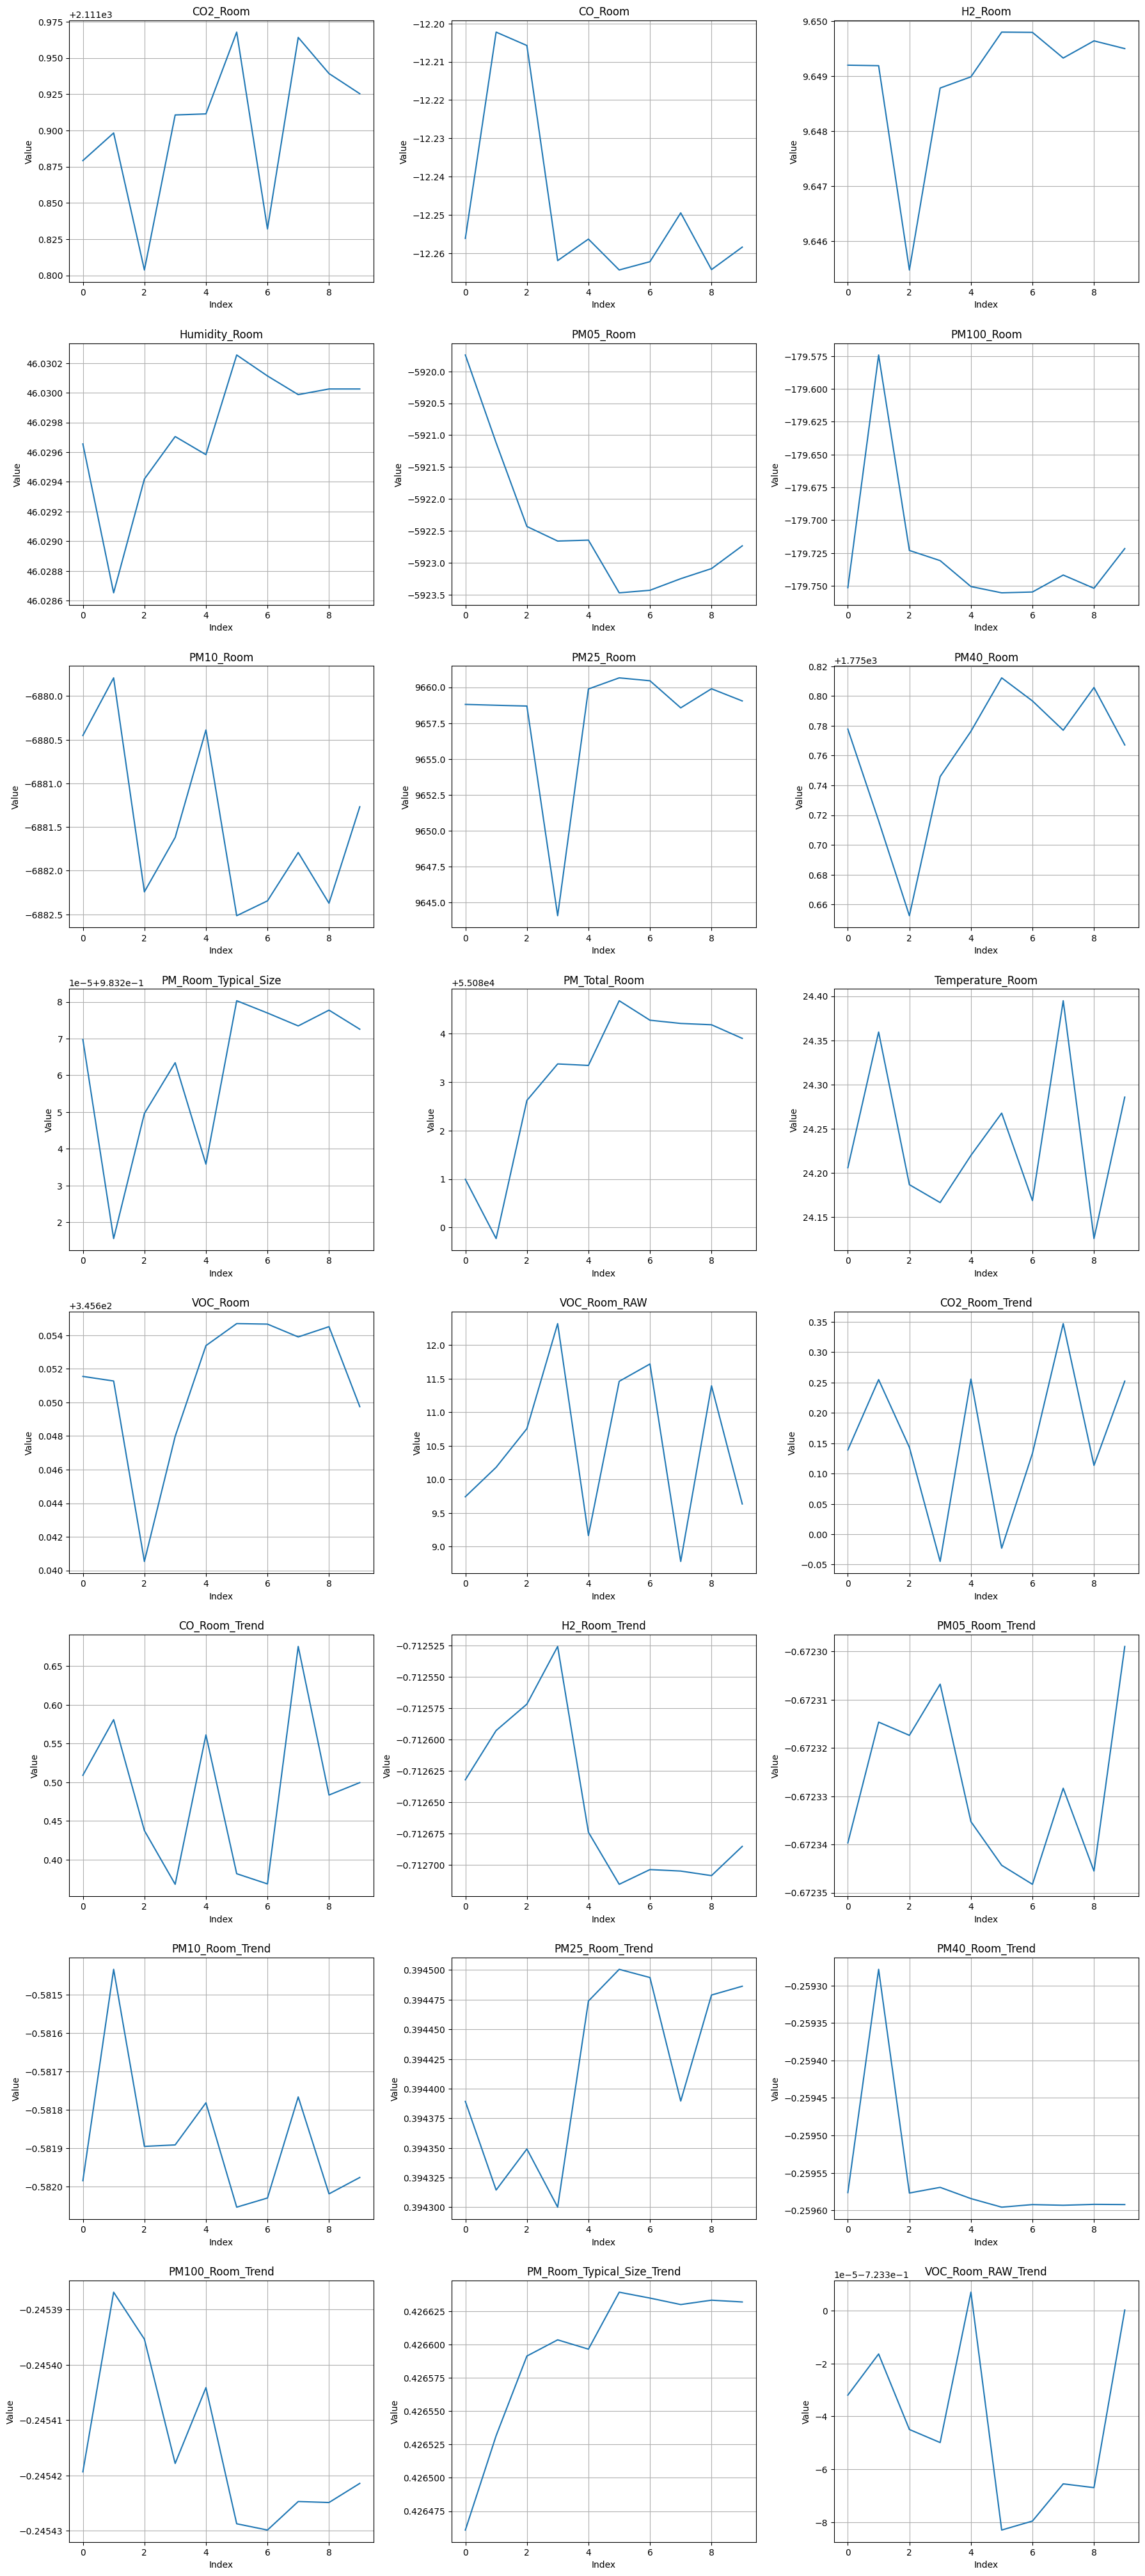

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df =  df_synthetic
num_cols = len(df.columns)
cols = 3  # 3 plots per row
rows = (num_cols // cols) + 1

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    plt.plot(df[col])  # Do NOT specify colors (as per rules)
    plt.title(col)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
enerator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')